<a href="https://colab.research.google.com/github/alam740/Data-Analytics-Course/blob/master/Lecture_4_Part_1_of_Model_Selection_and_Goodness_of_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats


# Model Selection and Goodness of Fit 
## Part 1 of 2




This notebook accompanies the ECE595 Data analytics course taught at Purdue in Fall 2022. These set of examples pertain to the materials of lecture 04.

Written by Rohan Sheridan (sherida7@purdue.edu)

In [ ]:
#@title Goodness of fit checks
def residual(y,yfit): 

  e = np.square(y-yfit)
  R = np.sum(e)

  return R

def r2Adj(R,M,y):

  R2 = R**2
  n = len(y)

  return ((n - 1)*R2 - (M - 1))/(n - M)

def AIC(R,M,y):

  R2 = R**2
  n = len(y)

  return n*np.log(R2/n) + 2*M

def BIC(R2,M,y):

  R2 = R**2
  n = len(y)

  return n*np.log(R2/n) + M*np.log(n)

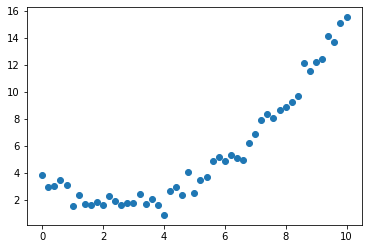

In [ ]:
## Create Random data to use in curve fitting
## The default will be 3rd order polynomial


def createData(order = 3, coeff = [3,-1.2,0.25], 
               n = 51, xlim = [0,10]):
  # parse in the desired order of your function
  # Also, include a list of coeff for the function

  if len(coeff) != order:
    order = len(coeff)

    # if func. order not consistent with coeff list, adjust...
  
  x = np.linspace(xlim[0],xlim[1],n)
  y = np.zeros_like(x)

  for i in range(order):

    y = y + coeff[i]*x**i

  return x,y


def addNoise(y,seed = 0, var = 0.5):

  ## Add some random gaussian noise

  np.random.seed(seed)
  y = y + np.random.normal(0,var,len(y))

  return y

x,y = createData()

y = addNoise(y)

plt.figure(1)
plt.scatter(x,y)

plt.show()

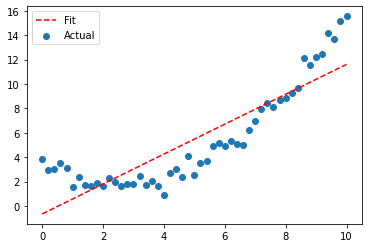

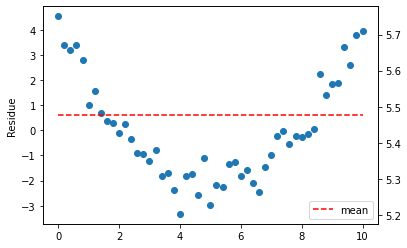

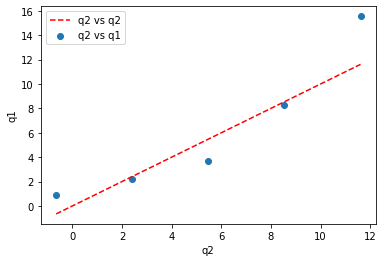

1.0 1.0 1.0

Residual:  210.42925165882073

Adjusted Residual:  44280.46995369131

AIC:  347.09014173071506

BIC:  349.0219673634394


In [ ]:
## Now we will try a curve fit with sklearn

# First we define the function we want to optimize

def func1(x,a,b):
  ## first order linear fit

  return a + x*b

popt, pcov = curve_fit(func1, x, y)

# popt returns the coefficients of the function 
# passed into the curve fit function
yfit = func1(x, *popt)

plt.figure(1)

## Plot the function against the actual data

plt.plot(x, yfit , 'r--')
plt.scatter(x,y)
plt.legend(["Fit","Actual"])

plt.figure(2)
ymean = np.mean(yfit)

## plot the residuals to see if there is correlation

plt.scatter(x,y - yfit)
plt.ylabel("Residue")
plt2 = plt.twinx()

plt2.plot(x,np.zeros_like(x)+ymean,'r--')

plt.xlabel("x")
plt2.legend(['mean'],loc='lower right')

plt.figure(3)

q1 = np.quantile(y,[0,0.25,0.5,0.75,1])
q2 = np.quantile(yfit,[0,0.25,0.5,0.75,1]) 

plt.scatter(q2,q1)
plt.plot(q2,q2,'r--')
plt.xlabel("q2")
plt.ylabel("q1")

plt.legend(["q2 vs q2","q2 vs q1"])

plt.show()

## flip x and y, then re-fit
## should be a good fit in both directions

def func1b(y,a,b):
  ## first order fit

  return a + y*b

popt, pcov = curve_fit(func1b, y, x)

xfit = func1b(y, *popt)

## use pearsonr to check fit and flipped fit
bx = stats.pearsonr(x,yfit)[0]
by = stats.pearsonr(y,xfit)[0]

r = np.sqrt(bx*by)

print(bx,by,r)

## calculate residual

R = residual(y,yfit)

print("\nResidual: ", R)

## use residual to calculate adjusted residual

radj = r2Adj(R,1,y)

print("\nAdjusted Residual: ",radj)

## Akaike information criterion

AC = AIC(R,1,y)

print("\nAIC: ",AC)

## Schwartz information criterion

BC = BIC(R,1,y)

print("\nBIC: ",BC)

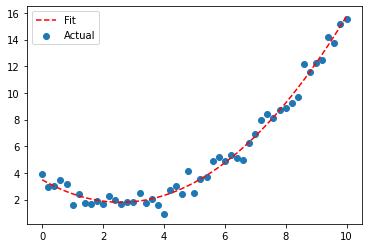

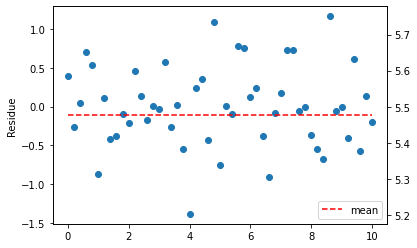

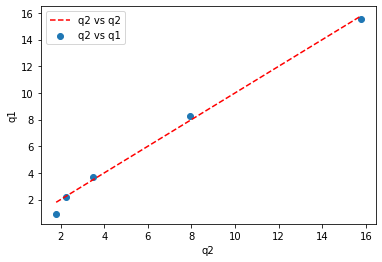

0.8783932059753318 0.9825897010694519 0.9290318173672734

Residual:  13.657168488518076

Adjusted Residual:  190.3043378813991

AIC:  70.13187660407034

BIC:  73.995527869519


In [ ]:
## Now we will try different curve fits with sklearn


def func2(x,a,b,c):
  ## second order fit

  return a + b*x + c*x**2


popt, pcov = curve_fit(func2, x, y)

yfit = func2(x, *popt)

plt.figure(1)

plt.plot(x, yfit , 'r--')
plt.scatter(x,y)
plt.legend(["Fit","Actual"])

plt.figure(2)
ymean = np.mean(yfit)

plt.scatter(x,y - yfit)
plt.ylabel("Residue")
plt2 = plt.twinx()

plt2.plot(x,np.zeros_like(x)+ymean,'r--')

plt.xlabel("x")
plt2.legend(['mean'],loc='lower right')

plt.figure(3)

q1 = np.quantile(y,[0,0.25,0.5,0.75,1])
q2 = np.quantile(yfit,[0,0.25,0.5,0.75,1]) 

plt.scatter(q2,q1)
plt.plot(q2,q2,'r--')
plt.xlabel("q2")
plt.ylabel("q1")

plt.legend(["q2 vs q2","q2 vs q1"])

plt.show()

def func2b(y,a,b,c):
  ## second order fit

  return a + b*y + c*y**2

popt, pcov = curve_fit(func2b, y, x)

xfit = func2b(y, *popt)

bx = stats.pearsonr(x,yfit)[0]
by = stats.pearsonr(y,xfit)[0]

r = np.sqrt(bx*by)

print(bx,by,r)

## calculate residual

R = residual(y,yfit)

print("\nResidual: ", R)

## use residual to calculate adjusted residual

radj = r2Adj(R,2,y)

print("\nAdjusted Residual: ",radj)

## Akaike information criterion

AC = AIC(R,2,y)

print("\nAIC: ",AC)

## Schwartz information criterion

BC = BIC(R,2,y)

print("\nBIC: ",BC)

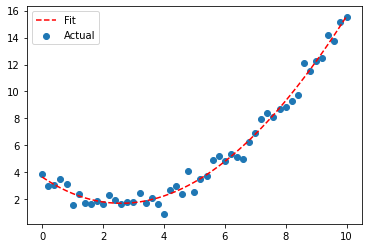

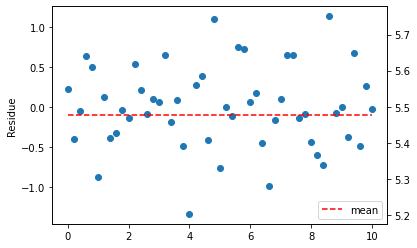

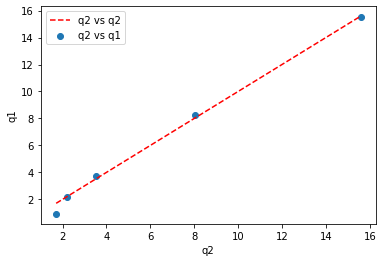

0.878256999494163 0.9805712715794932 0.9280051631147219

Residual:  13.389956417093424

Adjusted Residual:  186.7197217204806

AIC:  70.11639302199059

BIC:  75.91186992016357


In [ ]:
## Finally we will do a 3rd order fit


def func3(x,a,b,c,d):
  ## second order fit

  return a + b*x + c*x**2 + d*x**3


popt, pcov = curve_fit(func3, x, y)

yfit = func3(x, *popt)

plt.figure(1)

plt.plot(x, yfit , 'r--')
plt.scatter(x,y)
plt.legend(["Fit","Actual"])

plt.figure(2)
ymean = np.mean(yfit)

plt.scatter(x,y - yfit)
plt.ylabel("Residue")
plt2 = plt.twinx()

plt2.plot(x,np.zeros_like(x)+ymean,'r--')

plt.xlabel("x")
plt2.legend(['mean'],loc='lower right')

plt.figure(3)

q1 = np.quantile(y,[0,0.25,0.5,0.75,1])
q2 = np.quantile(yfit,[0,0.25,0.5,0.75,1]) 

plt.scatter(q2,q1)
plt.plot(q2,q2,'r--')
plt.xlabel("q2")
plt.ylabel("q1")

plt.legend(["q2 vs q2","q2 vs q1"])

plt.show()

def func3b(y,a,b,c,d):
  ## second order fit

  return a + b*y + c*y**2 + d*y**3

popt, pcov = curve_fit(func3b, y, x)

xfit = func3b(y, *popt)

bx = stats.pearsonr(x,yfit)[0]
by = stats.pearsonr(y,xfit)[0]

r = np.sqrt(bx*by)

print(bx,by,r)

## calculate residual

R = residual(y,yfit)

print("\nResidual: ", R)

## use residual to calculate adjusted residual

radj = r2Adj(R,3,y)

print("\nAdjusted Residual: ",radj)

## Akaike information criterion

AC = AIC(R,3,y)

print("\nAIC: ",AC)

## Schwartz information criterion

BC = BIC(R,3,y)

print("\nBIC: ",BC)